Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


loading dataset

In [2]:
data=pd.read_csv('Balaji Fast Food Sales.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


# looking for missing and duplicate values

In [3]:
data.isnull().sum()


,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,107
received_by,0
time_of_sale,0


transcation type has 107 null values

In [4]:
data.duplicated().sum()

0

no duplicates are here

# Data cleaning and other amendment for analysis

In [5]:
# filling the missing transaction_type with online
data['transaction_type']=data['transaction_type'].fillna('Online')

In [6]:
data['received_by']
# in this column we can replace it by gender for better idea
data['received_by'] = data['received_by'].replace(['Mr.','Mrs.'],['Male','Female'])
data['received_by']

,received_by
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
995,Female
996,Male
997,Male
998,Female


In [7]:
data['date'] = data['date'].str.replace('/','-')
data['date']

,date
0,07-03-2022
1,8-23-2022
2,11-20-2022
3,02-03-2023
4,10-02-2022
...,...
995,3-19-2023
996,9-20-2022
997,1-26-2023
998,8-27-2022


In [8]:
data['date']=pd.to_datetime(data['date'])
data['date']

,date
0,2022-07-03
1,2022-08-23
2,2022-11-20
3,2023-02-03
4,2022-10-02
...,...
995,2023-03-19
996,2022-09-20
997,2023-01-26
998,2022-08-27


In [9]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Online,Male,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Male,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Male,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Male,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Male,Evening


# Analysing data

# Univariate analysis

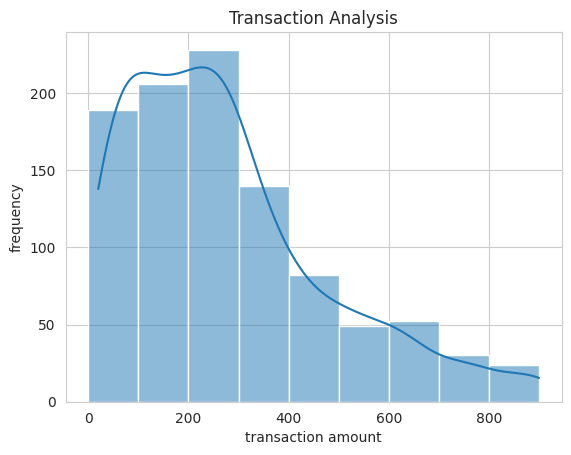

In [10]:
sns.set_style('whitegrid')
sns.histplot(data['transaction_amount'],bins=np.arange(0,1000,100),kde=True)
plt.title('Transaction Analysis')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()

we could clearly see that the maximum transaction amount has been done by people within 400 rupees since the frequency of transaction amount is high  

In [11]:
itemsType_price=data.groupby('item_type')['item_price'].mean()
print(itemsType_price)

item_type
Beverages    32.691083
Fastfood     33.600583
Name: item_price, dtype: float64


In [12]:
# first looking for the item type which is sold most
sorted_data1=data.groupby('item_type').agg({'quantity': 'sum', 'transaction_amount': 'sum'})
# this will tell which
Fastfood_type=data[data['item_type']=='Fastfood']
Beverages_type=data[data['item_type']=='Beverages']
Fastfood_data = Fastfood_type.groupby('item_name').agg({'quantity': 'sum', 'transaction_amount': 'sum'})
Beverages_data =Beverages_type.groupby('item_name').agg({'quantity': 'sum', 'transaction_amount': 'sum'})

In [13]:
item_price_fast=Fastfood_type.groupby('item_name')['item_price'].mean()
print(item_price_fast)

item_name
Aalopuri    20.0
Frankie     50.0
Panipuri    20.0
Sandwich    60.0
Vadapav     20.0
Name: item_price, dtype: float64


In [14]:
item_price_bev=Beverages_type.groupby('item_name')['item_price'].mean()
print(item_price_bev)

item_name
Cold coffee        40.0
Sugarcane juice    25.0
Name: item_price, dtype: float64


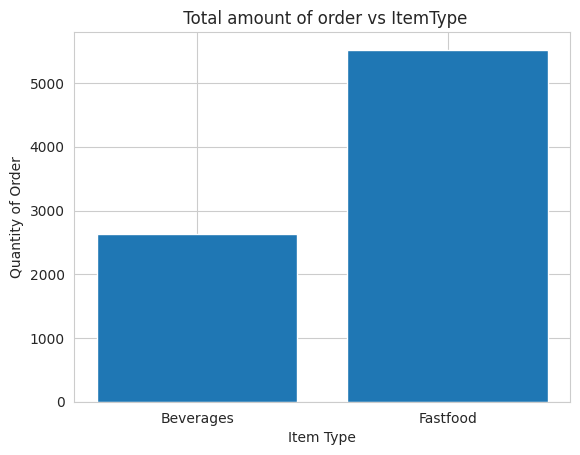

In [15]:
plt.bar(sorted_data1.index,sorted_data1['quantity'])
plt.title(' Total amount of order vs ItemType')
plt.xlabel('Item Type')
plt.ylabel('Quantity of Order')
plt.show()

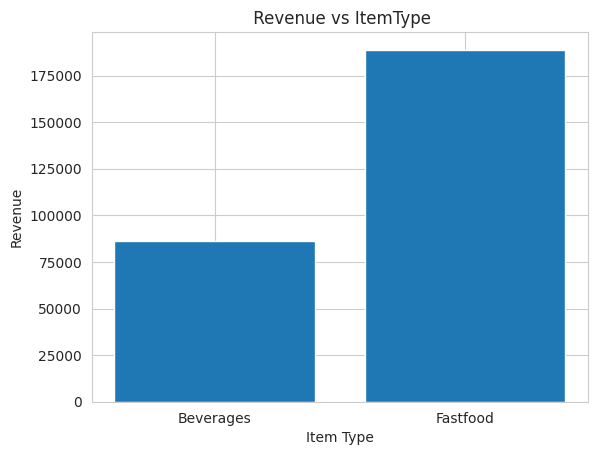

In [16]:
plt.bar(sorted_data1.index,sorted_data1['transaction_amount'])
plt.title(' Revenue vs ItemType')
plt.xlabel('Item Type')
plt.ylabel('Revenue')
plt.show()



*  we can see that major contributor in terms of quantity and earning is fastfood
*   Now we will check in fastfood which is the major contributor




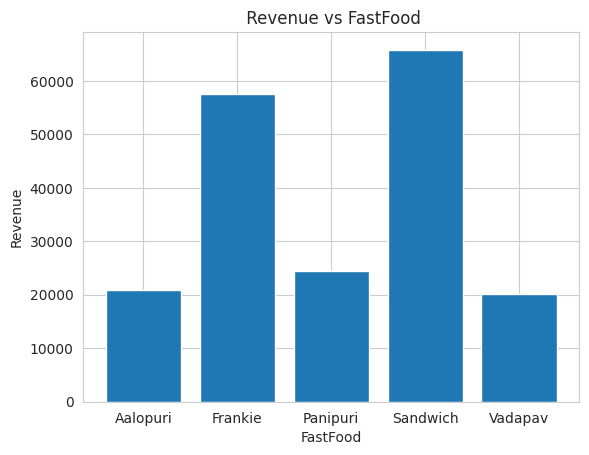

In [17]:
plt.bar(Fastfood_data .index,Fastfood_data['transaction_amount'])
plt.title(' Revenue vs FastFood')
plt.xlabel('FastFood')
plt.ylabel('Revenue')
plt.show()

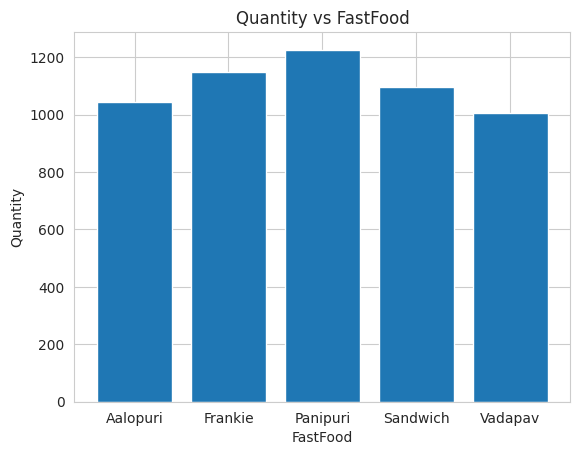

In [18]:
plt.bar(Fastfood_data .index,Fastfood_data['quantity'])
plt.title('Quantity vs FastFood')
plt.xlabel('FastFood')
plt.ylabel('Quantity')
plt.show()



*   From the above plots we could see that sandwich and frankie is contributing more in revenue snice its price is higher than other food
*   While panipuri, vadapav and aalopuri quantity is significant but the contribution in revenue is less due to low cost



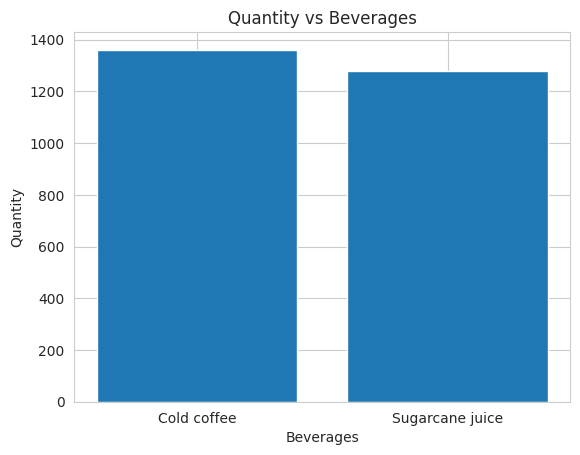

In [19]:
plt.bar(Beverages_data.index,Beverages_data['quantity'])
plt.title('Quantity vs Beverages')
plt.xlabel('Beverages')
plt.ylabel('Quantity')
plt.show()

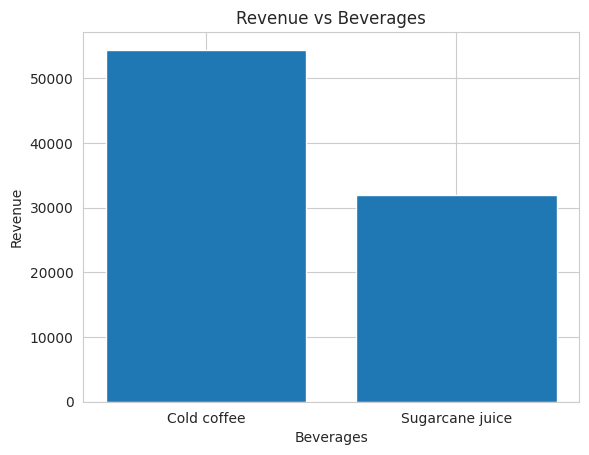

In [20]:
plt.bar(Beverages_data.index,Beverages_data['transaction_amount'])
plt.title('Revenue vs Beverages')
plt.xlabel('Beverages')
plt.ylabel('Revenue')
plt.show()

we can see that cold coffee is contributing more in revenue while sugarcane contribution is less despite its high ordered quantity which could be due to low cost of sugarcane juice

#Time Based analysis

Analysing monthly revenue

In [21]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month

#Creating a 'Month-Year' column for easier analysis
data['Month-Year'] = data['date'].dt.to_period('M')
month_revenue=data.groupby('Month-Year')['transaction_amount'].sum().reset_index()
print(month_revenue)

   Month-Year  transaction_amount
0     2022-04               17670
1     2022-05               26570
2     2022-06               17335
3     2022-07               19490
4     2022-08               22305
5     2022-09               18640
6     2022-10               27205
7     2022-11               22900
8     2022-12               23460
9     2023-01               28670
10    2023-02               25595
11    2023-03               25390


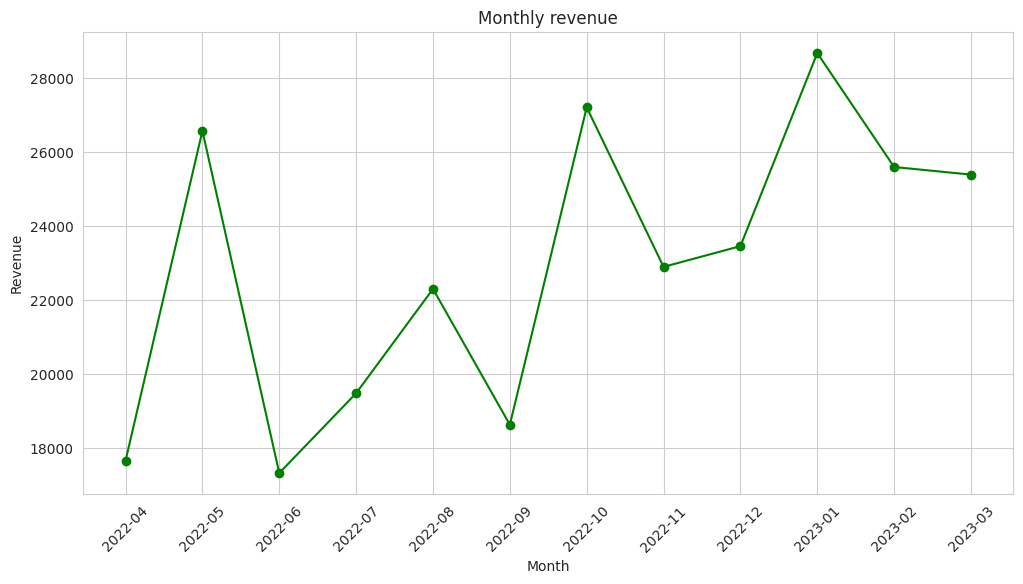

In [22]:
plt.figure(figsize=(12,6))
plt.plot(month_revenue['Month-Year'].astype(str),month_revenue['transaction_amount'],'o-g')
plt.title('Monthly revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(month_revenue['Month-Year'].astype(str), rotation=45)
plt.show()


Now we will be analysing each food and beverage over a time

In [32]:
# FastFood
Aalopuri_data=data[data['item_name']=='Aalopuri']
Aalopuri_data=Aalopuri_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()

# print(Aalopuri_data)

Frankie_data=data[data['item_name']=='Frankie']
Frankie_data=Frankie_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()

# print(Frankie_data)

Panipuri_data=data[data['item_name']=='Panipuri']
Panipuri_data=Panipuri_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()
# print(Panipuri_data)

Sandwich_data=data[data['item_name']=='Sandwich']
Sandwich_data=Sandwich_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()
# print(Sandwich_data)


Vadapav_data=data[data['item_name']=='Vadapav']
Vadapav_data=Vadapav_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()
# print(Vadapav_data)

ColdCoffee_data=data[data['item_name']=='Cold coffee']
ColdCoffee_data=ColdCoffee_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()
print(ColdCoffee_data)

sugarcane_data=data[data['item_name']=='Sugarcane juice']
sugarcane_data=sugarcane_data.groupby('Month-Year')['transaction_amount'].sum().reset_index()
print(sugarcane_data)

   Month-Year  transaction_amount
0     2022-04                2840
1     2022-05                4680
2     2022-06                1840
3     2022-07                2440
4     2022-08                6040
5     2022-09                2680
6     2022-10                6240
7     2022-11                6160
8     2022-12                6040
9     2023-01                3760
10    2023-02                6040
11    2023-03                5680
   Month-Year  transaction_amount
0     2022-04                1300
1     2022-05                3000
2     2022-06                1875
3     2022-07                3050
4     2022-08                3225
5     2022-09                2150
6     2022-10                3675
7     2022-11                1700
8     2022-12                3800
9     2023-01                3600
10    2023-02                1875
11    2023-03                2700


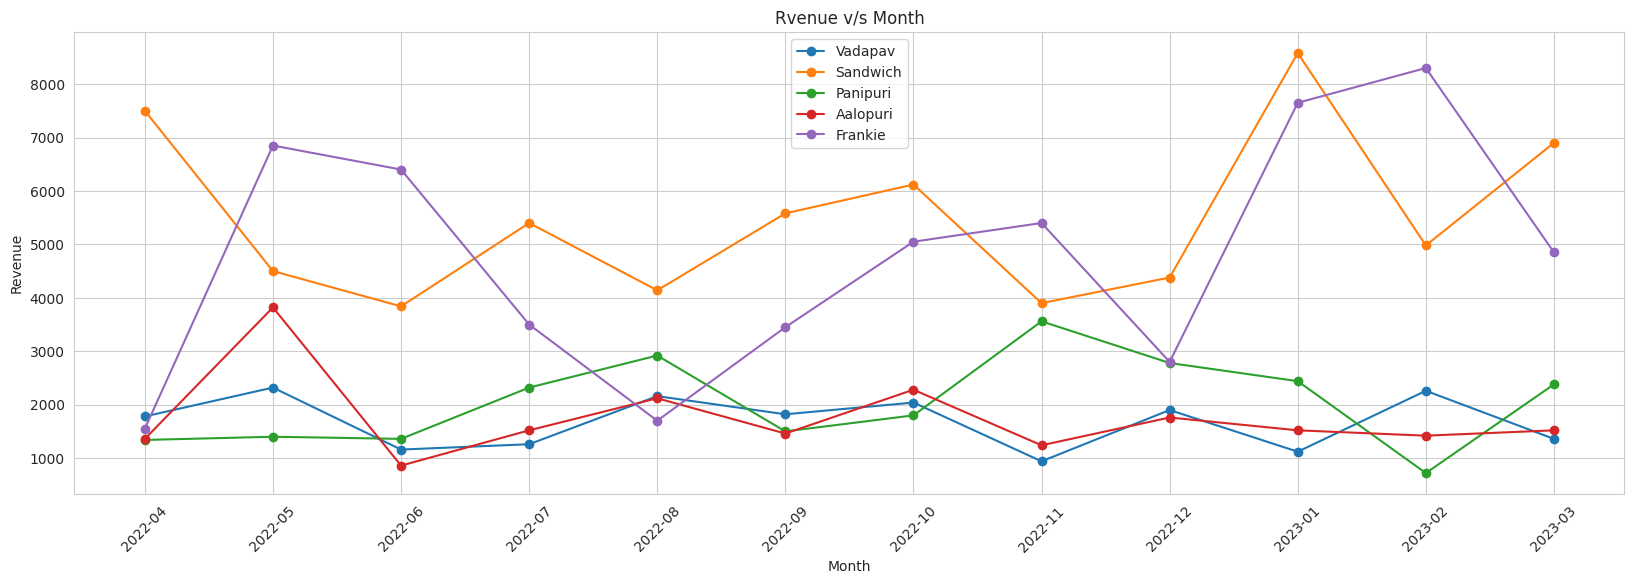

In [36]:
plt.figure(figsize=(20,6))
plt.plot(Vadapav_data['Month-Year'].astype(str),Vadapav_data.transaction_amount,'o-',label='Vadapav')
plt.plot(Sandwich_data['Month-Year'].astype(str),Sandwich_data.transaction_amount,'o-',label='Sandwich')
plt.plot(Panipuri_data['Month-Year'].astype(str),Panipuri_data.transaction_amount,'o-',label='Panipuri')
plt.plot(Aalopuri_data['Month-Year'].astype(str),Aalopuri_data.transaction_amount,'o-',label='Aalopuri')
plt.plot(Frankie_data['Month-Year'].astype(str),Frankie_data.transaction_amount,'o-',label='Frankie')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(month_revenue['Month-Year'].astype(str), rotation=45)
plt.title('Rvenue v/s Month')
plt.legend()
plt.show()

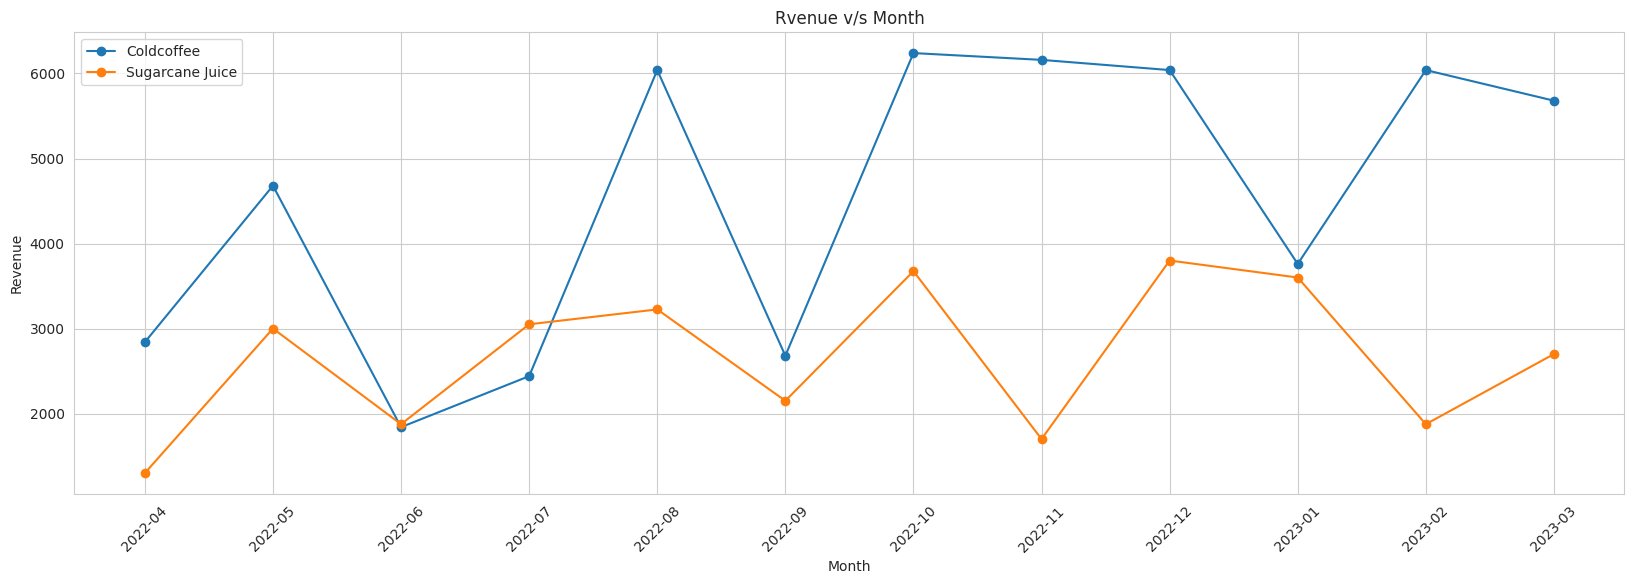

In [38]:
plt.figure(figsize=(20,6))
plt.plot(ColdCoffee_data['Month-Year'].astype(str),ColdCoffee_data.transaction_amount,'o-',label='Coldcoffee')
plt.plot(sugarcane_data['Month-Year'].astype(str),sugarcane_data.transaction_amount,'o-',label='Sugarcane Juice')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(month_revenue['Month-Year'].astype(str), rotation=45)
plt.title('Rvenue v/s Month')
plt.legend()
plt.show()

Analysing revenue and order quantity with what time of the day i.e morning,night,evening or night

In [40]:
shift_data=data.groupby('time_of_sale').agg({'quantity': 'sum', 'transaction_amount': 'sum'}).reset_index()
print(shift_data)

  time_of_sale  quantity  transaction_amount
0    Afternoon      1714               56345
1      Evening      1540               52355
2     Midnight      1575               50725
3      Morning      1574               53730
4        Night      1759               62075


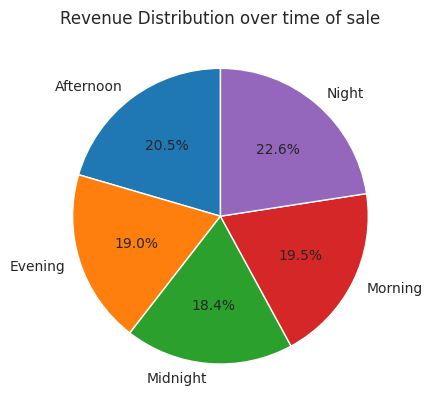

In [41]:
plt.pie(shift_data['transaction_amount'],labels=shift_data['time_of_sale'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution over time of sale')
plt.show()

In [51]:

sales_data = data.groupby(['item_name', 'time_of_sale'])['transaction_amount'].sum().reset_index()
print(sales_data)

          item_name time_of_sale  transaction_amount
0          Aalopuri    Afternoon                4520
1          Aalopuri      Evening                2720
2          Aalopuri     Midnight                4460
3          Aalopuri      Morning                4300
4          Aalopuri        Night                4880
5       Cold coffee    Afternoon               13480
6       Cold coffee      Evening                9400
7       Cold coffee     Midnight                8120
8       Cold coffee      Morning               11480
9       Cold coffee        Night               11960
10          Frankie    Afternoon               11900
11          Frankie      Evening               12000
12          Frankie     Midnight                9900
13          Frankie      Morning               10200
14          Frankie        Night               13500
15         Panipuri    Afternoon                4600
16         Panipuri      Evening                4820
17         Panipuri     Midnight              

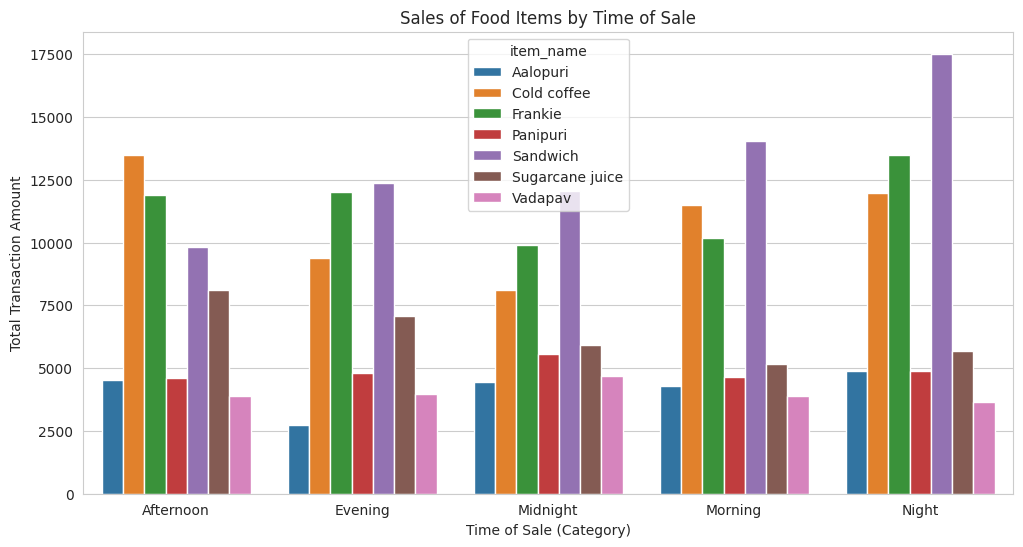

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data, x='time_of_sale', y='transaction_amount', hue='item_name')
plt.title('Sales of Food Items by Time of Sale')
plt.xlabel('Time of Sale (Category)')
plt.ylabel('Total Transaction Amount')
plt.legend(title='item_name')
plt.show()

Transaction Type Analysis

In [42]:
transaction_data=data.groupby('transaction_type')['transaction_amount'].sum().reset_index()
print(transaction_data)

  transaction_type  transaction_amount
0             Cash              132840
1           Online              142390


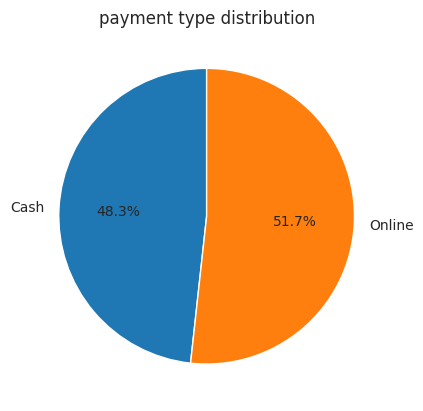

In [43]:
plt.pie(transaction_data['transaction_amount'],labels=transaction_data['transaction_type'], autopct='%1.1f%%', startangle=90)
plt.title('payment type distribution')
plt.show()

Gender Type Analysis

In [45]:
gender_data=data.groupby('received_by')['transaction_amount'].sum().reset_index()
print(gender_data)

  received_by  transaction_amount
0      Female              131790
1        Male              143440


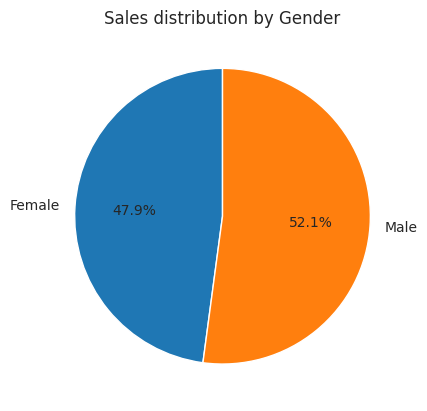

In [47]:
plt.pie(gender_data['transaction_amount'],labels=gender_data['received_by'], autopct='%1.1f%%', startangle=90)
plt.title('Sales distribution by Gender')
plt.show()